In [4]:
#IMPORT TRAINING DATA
!wget --quiet -O resources/data/training_data_pytorch.tar.gz https://cocl.us/DL0320EN_TRAIN_TAR_PYTORCH
!tar -xzf  resources/data/training_data_pytorch.tar.gz -C resources/data/

In [5]:
#IMPORT VALIDATION DATA
!wget --quiet -O resources/data/validation_data_pytorch.tar.gz https://cocl.us/DL0320EN_VALID_TAR_PYTORCH
!tar -xzf  resources/data/validation_data_pytorch.tar.gz -C resources/data

In [6]:
#IMPORT TEST DATA 
!wget --quiet -O resources/data/test_data_pytorch.tar.gz https://cocl.us/DL0320EN_TEST_TAR_PYTORCH
!tar -xzf resources/data/test_data_pytorch.tar.gz -C resources/data --exclude '.*'

In [7]:
# Import the libraries for plotting images

import matplotlib.pyplot as plt
from PIL import Image

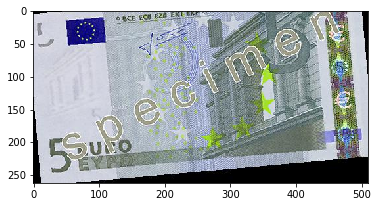

In [12]:
#Load and plot sample one 0.jpeg from the training data. You can use the function img = Image.open(Input) from the PIL 
#library to load the image. The argument is one string that includes the name of the directory and the name of the 
#image and its extension in the following form: 
#Input= "/directory _name/image_name.jpeg" 
#The function returns the value img. In order to plot the image, you can use the plt.imshow(img).
Input = "resources/data/training_data_pytorch/0.jpeg"
img = Image.open(Input)
plt.imshow(img)

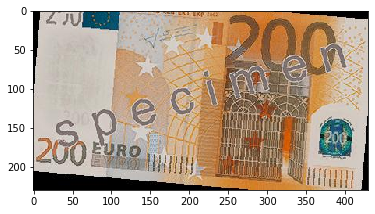

In [13]:
#Load and plot sample 53 (52.jpeg) from the training data.
Input2 = "resources/data/training_data_pytorch/52.jpeg"
img2 = Image.open(Input2)
plt.imshow(img2)

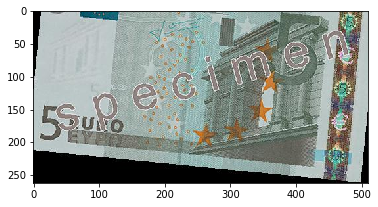

In [14]:
#Load and plot sample 1 (<i>0.jpeg</i>) from the validation data. 
#The directory is given in the variable <code>validation_dir</code> as a string. 
Input3 = "resources/data/validation_data_pytorch/0.jpeg"
img3 = Image.open(Input3)
plt.imshow(img3)

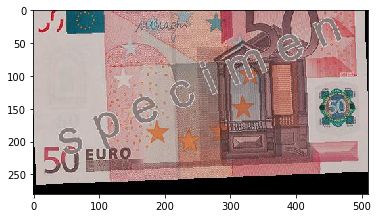

In [15]:
#Load and plot sample 35 (36.jpeg) from the validation data. 
#The directory is given in the variable validation_dir as a string

Input4 = "resources/data/validation_data_pytorch/35.jpeg"
img4 = Image.open(Input4)
plt.imshow(img4)

In [1]:
# Download Training Dataset
!wget --quiet -O resources/data/training_data_pytorch.tar.gz https://cocl.us/DL0320EN_TRAIN_TAR_PYTORCH
!tar -xzf  resources/data/training_data_pytorch.tar.gz -C resources/data --exclude '.*'

# Download Validation Dataset
!wget --quiet -O resources/data/validation_data_pytorch.tar.gz https://cocl.us/DL0320EN_VALID_TAR_PYTORCH
!tar -xzf  resources/data/validation_data_pytorch.tar.gz -C resources/data --exclude '.*'

In [2]:
# PyTorch Modules you need for this lab

import torch
from torch.utils.data import Dataset, DataLoader

import pandas
from torchvision import transforms

In [3]:
# Other non-PyTorch Modules

from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
import pandas as pd
from PIL import Image

In [4]:
# train_csv_file contains the URL that contains the CSV file we needed

train_csv_file = 'https://cocl.us/DL0320EN_TRAIN_CSV'

In [5]:
# Read CSV file from the URL and print out the first five samples

train_data_name = pd.read_csv(train_csv_file)
train_data_name.head()

,Unnamed: 0,denomination,filename,y
0,0,5,0.jpeg,0
1,1,5,1.jpeg,0
2,2,5,2.jpeg,0
3,3,5,3.jpeg,0
4,4,5,4.jpeg,0


In [6]:
# Get the value on location row 0, column 2 (Notice that index starts at 0.)

print('File name:', train_data_name.iloc[0, 2])

File name: 0.jpeg


In [7]:
# Print out the file name and the class number of the element on row 1 (the second row)

print('File name:', train_data_name.iloc[1, 2])
print('y:', train_data_name.iloc[1, 3])

File name: 1.jpeg
y: 0


In [8]:
# Print out the total number of rows in traing dataset

print('The number of rows: ', train_data_name.shape[0])

The number of rows:  70


In [9]:
# The url for getting csv file for validation dataset

validation_csv_file='https://cocl.us/DL0320EN_VALID_CSV'

In [10]:
# Load csv file and print the first five rows
# Won't be graded

# Type your code here

In [11]:
# Print the sample image file name and class number for row 10 (the 11th row)
# Won't be graded

# Type your code here

In [12]:
# Save the image folderpath in a variable

train_data_dir = 'resources/data/training_data_pytorch/'

In [13]:
# Print the file name on the second row

train_data_name.iloc[1, 2]

'1.jpeg'

In [14]:
# Combine the directory path with file name

train_image_name = train_data_dir + train_data_name.iloc[1, 2]

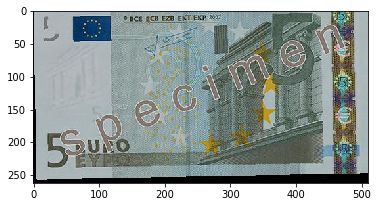

In [15]:
# Plot the second training image

image = Image.open(train_image_name)
plt.imshow(image)
plt.show()

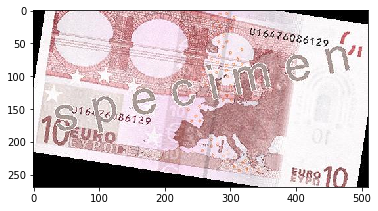

In [16]:
# Plot the 20th image

train_image_name = train_data_dir + train_data_name.iloc[19, 2]
image = Image.open(train_image_name)
plt.imshow(image)
plt.show()

In [24]:
# Save the image folderpath in a variable

validation_data_dir='resources/data/validation_data_pytorch/'

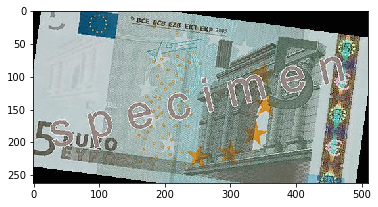

In [25]:
# Use the same procedure as above to load and plot the second validation image
# Won't be graded

# Type your code here
validation_data_name = pd.read_csv(validation_csv_file)
validation_image_name = validation_data_dir + validation_data_name.iloc[1, 2]
image = Image.open(validation_image_name)
plt.imshow(image)
plt.show()

In [19]:
# Create your own dataset object

class Dataset(Dataset):

    # Constructor
    def __init__(self, csv_file, data_dir, transform=None):
        
        # Image directory
        self.data_dir=data_dir
        
        # The transform is goint to be used on image
        self.transform = transform
        
        # Load the CSV file contians image info
        self.data_name= pd.read_csv(csv_file)
        
        # Number of images in dataset
        self.len=self.data_name.shape[0] 
    
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        
        # Image file path
        img_name=self.data_dir + self.data_name.iloc[idx, 2]
        
        # Open image file
        image = Image.open(img_name)
        
        # The class label for the image
        y = self.data_name.iloc[idx, 3]
        
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y

In [27]:
# Create the dataset objects

train_dataset = Dataset(csv_file=train_csv_file
                        , data_dir='resources/data/training_data_pytorch/')
validation_data = Dataset(csv_file=validation_csv_file
                          , data_dir='resources/data/validation_data_pytorch/')

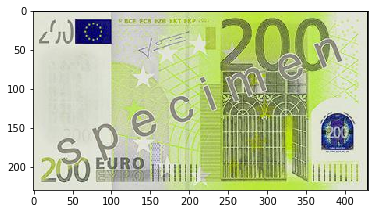

5


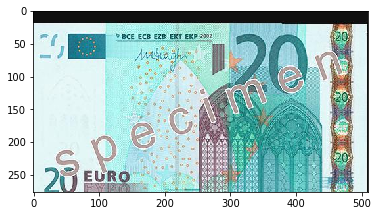

2


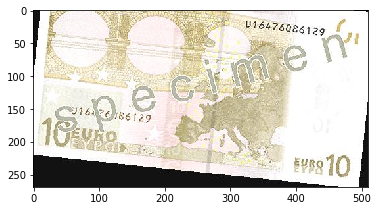

1


In [32]:
# Question 2.1
# Answer the question in the quiz

samples = [53, 23, 10]

# Type your code here
for x in samples:
    pic, num = train_dataset[x]
    plt.imshow(pic)
    plt.show()
    print(num)

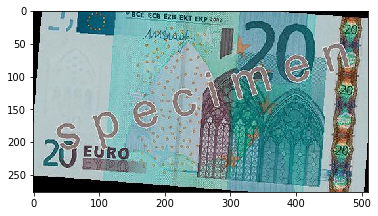

2


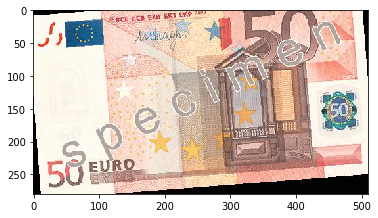

3


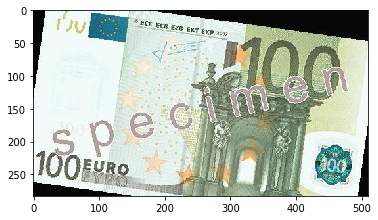

4


In [33]:
# Question 2.2
# Answer the question in the quiz

samples =[22, 32, 45]

# Type your code here

for x in samples:
    pic, num = validation_data[x]
    plt.imshow(pic)
    plt.show()
    print(num)

In [1]:

import torch 
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
import pandas
from torchvision import transforms
import torch.nn as nn
torch.manual_seed(0)

In [3]:

import time
from imageio import imread
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
import random
import numpy as np

In [4]:
# Url that contains CSV files

train_csv_file = 'https://cocl.us/DL0320EN_TRAIN_CSV'
validation_csv_file = 'https://cocl.us/DL0320EN_VALID_CSV'

In [5]:
# Absolute path for finding the directory contains image datasets

train_data_dir = 'resources/data/training_data_pytorch/'
validation_data_dir = 'resources/data/validation_data_pytorch/'

In [6]:
# Create Dateaset Class

class Dataset(Dataset):
    
    # Constructor
    def __init__(self, csv_file, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.data_name = pd.read_csv(csv_file)
        self.len = self.data_name.shape[0] 
    
    # Get Length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        img_name = self.data_dir + self.data_name.iloc[idx, 2]
        image = Image.open(img_name)
        y = self.data_name.iloc[idx, 3]
        if self.transform:
            image = self.transform(image)
        return image, y

In [7]:
# Construct the composed object for transforming the image

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
composed = transforms.Compose([transforms.Resize((224, 224))
                               , transforms.ToTensor()
                               , transforms.Normalize(mean, std)])

In [8]:
# Create the train dataset and validation dataset

train_dataset = Dataset(transform=composed
                        ,csv_file=train_csv_file
                        ,data_dir=train_data_dir)

validation_dataset = Dataset(transform=composed
                          ,csv_file=validation_csv_file
                          ,data_dir=validation_data_dir)

In [9]:
#Step 1: Load the pre-trained model resnet18 
#Set the parameter pretrained to true.

model = models.resnet18(pretrained=True)


Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to C:\Users\dougm/.cache\torch\checkpoints\resnet18-5c106cde.pth
52.5%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
#Step 2: The following lines of code will set the attribute requires_grad to False. 
#As a result, the parameters will not be affected by training.
for param in model.parameters():
    param.requires_grad=False
#resnet18 is used to classify 1000 different objects; as a result, the last 
#layer has 1000 outputs. The 512 inputs come from the fact that the previously 
#hidden layer has 512 outputs.

In [11]:
#Step 3: Replace the output layer model.fc of the neural network with a 
#nn.Linear object, to classify 7 different bills. For the parameters in_features
#remember the last hidden layer has 512 neurons.

model.fc=nn.Linear(512,7)


In [12]:
# Print the model (PLEASE DO NOT MODIFY THIS BOX)

print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [13]:
# Step 1: Create the loss function
criterion=nn.CrossEntropyLoss()

In [14]:
# Step 2: Create the data loader
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=15)
validation_loader=torch.utils.data.DataLoader(dataset=validation_dataset,batch_size=10)

In [18]:
# Step 3: Use the pre-defined optimizer Adam with learning rate 0.003
optimizer=torch.optim.Adam([parameters for parameters in model.parameters() if parameters.requires_grad], lr=0.003)

In [19]:
# Step 4: Train the model

N_EPOCHS = 20
loss_list = []
accuracy_list = []
correct = 0
n_test = len(validation_dataset)

for epoch in range(N_EPOCHS):
    loss_sublist = []
    for x,y in train_loader:
        model.train()
        optimizer.zero_grad()
        z=model(x)
        loss=criterion(z,y)
        loss_sublist.append(loss.data.item())
        loss.backward()
        optimizer.step()
    loss_list.append(np.mean(loss_sublist))
    
    correct=0
    for x_test, y_test in validation_loader:
        model.eval()
        z=model(x_test)
        _,yhat=torch.max(z.data,1)
        correct += (yhat == y_test).sum().item()
    accuracy = correct/n_test
    accuracy_list.append(accuracy)

        

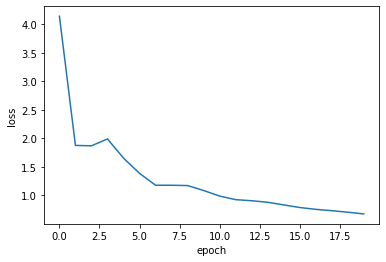

In [25]:
# Step 5: Plot the loss for training dataset

x = np.arange(len(loss_list))
y = loss_list
fig = plt.figure()
ax = plt.subplot(111)
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.plot(x,y)
plt.show()


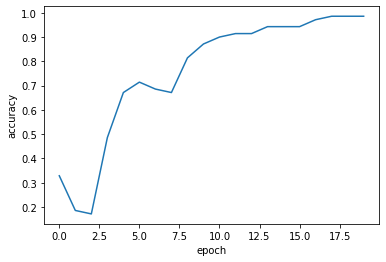

In [26]:
# Step 6: Plot the accuracy for valdiation dataset

x = np.arange(len(accuracy_list))
y = accuracy_list
fig = plt.figure()
ax = plt.subplot(111)
ax.set_ylabel('accuracy')
ax.set_xlabel('epoch')
ax.plot(x,y)
plt.show()

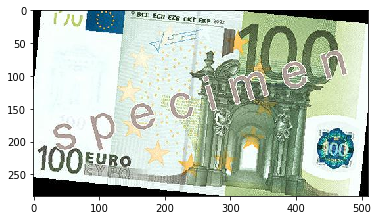

Actual denomination:  predicted: $100
Predicted denomination:  predicted: $100


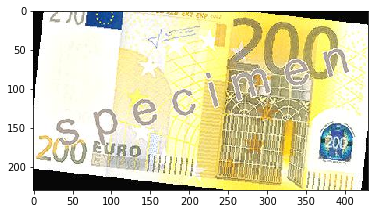

Actual denomination:  predicted $200
Predicted denomination:  predicted $200


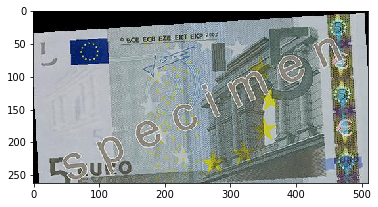

Actual denomination:  predicted: $5
Predicted denomination:  predicted: $5


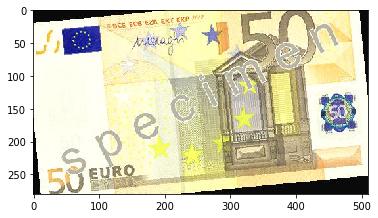

Actual denomination:  predicted: $50
Predicted denomination:  predicted: $50


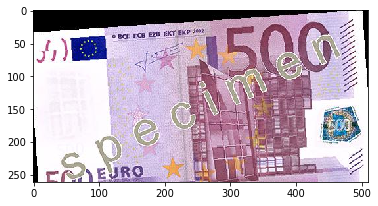

Actual denomination:  predicted $500
Predicted denomination:  predicted $500


In [67]:
# Plot the images with labels

look_up = {0: 'predicted: $5'
           , 1: 'predicted: $10'
           , 2: 'predicted: $20'
           , 3: 'predicted: $50'
           , 4: 'predicted: $100'
           , 5: 'predicted $200'
           , 6: 'predicted $500'}
random.seed(0)
numbers = random.sample(range(70), 5)

#create test set from validation data

test_loader=torch.utils.data.DataLoader(dataset=validation_dataset,batch_size=1)

actual = []
predicted = []
for x_test, y_test in test_loader:
        
        model.eval()
        z=model(x_test)
        _,yhat=torch.max(z.data,1)
        predicted.append(yhat)
        actual.append(y_test)
#Create plot_random_image function to plot 5 random images whose index are in 
#the numbers list        
     
test_data = Dataset(csv_file=validation_csv_file
                          , data_dir='resources/data/validation_data_pytorch/')
    
def plot_random_image(samples):
    for x in samples:
        pic, num = test_data[x]
        plt.imshow(pic)
        plt.show()
        print("Actual denomination: ", look_up[num])
        print("Predicted denomination: ", look_up[predicted[x].item()])
        
plot_random_image(numbers)

In [73]:
#Repeat the steps in Question 3.1, 3.2 to predict the result using 
#models.densenet121 model. Then, print out the last validation accuracy.

model_des = models.densenet121(pretrained=True)

In [77]:
for param in model.parameters():
    param.requires_grad=True
model_des.fc=nn.Linear(1024,7)

In [78]:
# Step 1: Create the loss function
criterion=nn.CrossEntropyLoss()
# Step 2: Create the data loader
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=15)
validation_loader=torch.utils.data.DataLoader(dataset=validation_dataset,batch_size=10)
optimizer=torch.optim.Adam([parameters for parameters in model_des.parameters() if parameters.requires_grad], lr=0.003)


In [79]:
# Step 4: Train the model

N_EPOCHS = 10
loss_list = []
accuracy_list = []
correct = 0
n_test = len(validation_dataset)

for epoch in range(N_EPOCHS):
    loss_sublist = []
    for x,y in train_loader:
        model_des.train()
        optimizer.zero_grad()
        z=model(x)
        loss=criterion(z,y)
        loss_sublist.append(loss.data.item())
        loss.backward()
        optimizer.step()
    loss_list.append(np.mean(loss_sublist))
    
    correct=0
    for x_test, y_test in validation_loader:
        model_des.eval()
        z=model(x_test)
        _,yhat=torch.max(z.data,1)
        correct += (yhat == y_test).sum().item()
    accuracy = correct/n_test
    accuracy_list.append(accuracy)

        

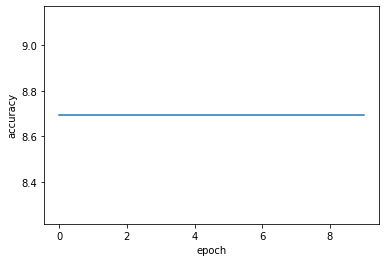

In [80]:
# Step 5: Plot the accuracy for validation

x = np.arange(len(accuracy_list))
y = loss_list
fig = plt.figure()
ax = plt.subplot(111)
ax.set_ylabel('accuracy')
ax.set_xlabel('epoch')
ax.plot(x,y)
plt.show()